In [2]:
import pandas as pd
import numpy as np

### 匯入數據集

In [3]:
housing_datasets=pd.read_csv('housing.csv')

In [4]:
len(housing_datasets)

489

In [5]:
housing_datasets.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


#### RM: 每個住宅的平均房間數
#### LSTAT: 處於較低地位的人口百分比    
#### PTRATIO: 各鎮師生比例    
#### MEDV: 業主自用房屋的中位數

### 查看缺失值

In [6]:
housing_datasets.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

### 各特徵和MEDV關係

RM


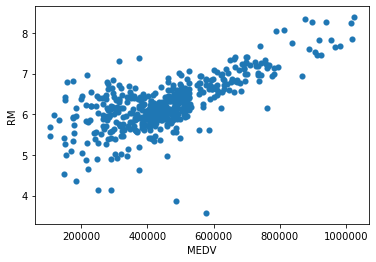

LSTAT


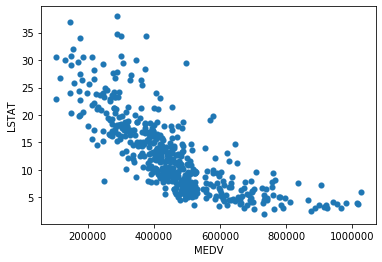

PTRATIO


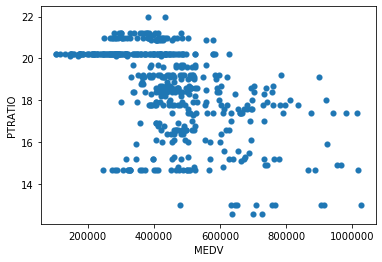

In [7]:
import matplotlib.pyplot as plt

datasets_key = ['RM', 'LSTAT', 'PTRATIO']
labels_key = ['MEDV']

for i in datasets_key:
    print(i)
    plt.scatter(housing_datasets[['MEDV']], housing_datasets[i], linewidths=0.1)
    plt.xlabel("MEDV")
    plt.ylabel(i)
    plt.show()

### 建立訓練集測試集

In [8]:
from sklearn.model_selection import train_test_split                # 資料分割庫(訓練集、測試集)
housing_train, housing_tests = train_test_split(housing_datasets, test_size=0.3)
print(len(housing_train))
print(len(housing_tests))

342
147


### 分割特徵, 數值轉換

In [9]:
train_datasets = housing_train[datasets_key]#.values
train_labels = housing_train[labels_key]#.values

tests_datasets = housing_tests[datasets_key]#.values
tests_labels = housing_tests[labels_key]#.values

### 標準化

In [10]:
from sklearn import preprocessing # 標準化數據庫
train_RM = preprocessing.minmax_scale(train_datasets['RM'], feature_range = (0,1))
tests_RM = preprocessing.minmax_scale(tests_datasets['RM'], feature_range = (0,1))

train_datasets = preprocessing.minmax_scale(train_datasets, feature_range = (0,1))
train_labels = preprocessing.minmax_scale(train_labels)

tests_datasets = preprocessing.minmax_scale(tests_datasets, feature_range = (0,1))
tests_labels = preprocessing.minmax_scale(tests_labels)

In [11]:
train_labels=train_labels[:,0]
tests_labels=tests_labels[:,0]

In [12]:
print(train_datasets.shape)
print(train_labels.shape)

print(tests_datasets.shape)
print(tests_labels.shape)

(342, 3)
(342,)
(147, 3)
(147,)


### 回歸

In [13]:
from sklearn.svm import SVR

SVR_model = SVR()
SVR_model.fit(train_datasets, train_labels)
predict_train = SVR_model.predict(train_datasets)

predict_train = predict_train.reshape(342,)    # 轉換為 (342, )
print(predict_train.shape)

(342,)


In [14]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("RMSE=", np.sqrt(metrics.mean_squared_error(train_labels, predict_train))) # 使用RMSE查看
print("R2=", r2_score(train_labels,predict_train)*100, '%') # 線性迴歸的衡量標準

RMSE= 0.06965024482035842
R2= 85.4269348305968 %


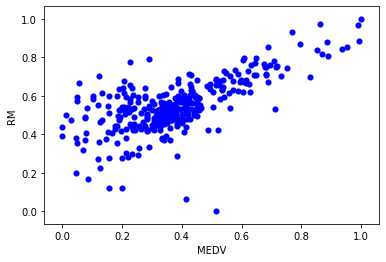

In [16]:
#plt.plot(train_labels, predict_train, c="r")
plt.scatter(train_labels, train_RM, linewidths=0.1 ,c="b")   # 資料分布
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()

In [15]:
from sklearn.svm import SVR

SVR_model = SVR()
SVR_model.fit(tests_datasets, tests_labels)
predict_tests = SVR_model.predict(tests_datasets)

predict_tests = predict_tests.reshape(147,)    # 轉換為 (147, )
print(predict_tests.shape)

(147,)


In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score # 

print("RMSE=", np.sqrt(metrics.mean_squared_error(tests_labels, predict_tests))) # 使用RMSE查看
print("R2=", r2_score(tests_labels,predict_tests)*100, '%') # 線性迴歸的衡量標準

RMSE= 0.07203977898032435
R2= 83.97689554131912 %


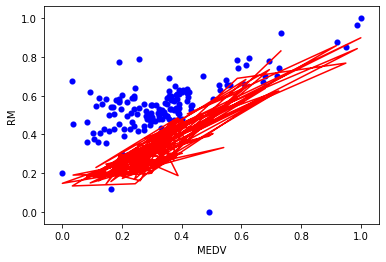

In [17]:
plt.plot(tests_labels, predict_tests, c="r")
plt.scatter(tests_labels, tests_RM, linewidths=0.1 ,c="b")   # 資料分布
plt.xlabel("MEDV")
plt.ylabel("RM")
plt.show()